<a href="https://colab.research.google.com/github/ArunKls/AppWall/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import numpy as np
filename = 'dataset1.csv'
data = pandas.read_csv(filename)
data1=data.drop(columns="Source IP")
#data1=data1.drop(columns="Destination IP")
data1=data1.drop(columns="date")
data1=data1.drop(columns="network")
data1=data1.drop(columns="Protocol")
data1.drop(data1.iloc[:, 22:34], inplace = True, axis = 1)
data1.replace('', np.nan, inplace=True)
counts = data1['label'].value_counts().to_dict()
for j,i in data1.iterrows():
  if(counts[i['label']]<800):
    data1.loc[j,'label']="Other"
print(data1['label'].value_counts())

WeChat            22497
Other             16839
tencent_video     11764
Bilibili           8461
SouGouInput        8290
TaoBao             7341
BaiDu              6839
QQ                 5915
DiDi               4162
QQMail             3909
JingDong           2973
UCExplore          2808
MOMO               2548
Alipay             2314
tantan             2096
KuaiShou_video     2051
iQiYi              1941
DingTalk           1823
Amap               1797
BaiDu_NetDisk      1782
Arena of Valor     1697
TikToc             1571
NeteaseMusic       1444
RenRenVideo        1263
WeiBo              1047
HuYa               1009
tencent_news        943
XianYu              932
NewsArticle         881
DianPing            880
Name: label, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.04396406 0.11935325 0.02350165 0.0616084  0.02039681 0.02117393
 0.01673983 0.01977776 0.03838297 0.03419053 0.03615743 0.04610138
 0.05492775 0.03149133 0.03450233 0.05290726 0.05731879 0.04947676
 0.06223993 0.04838114 0.08017214 0.04723458]


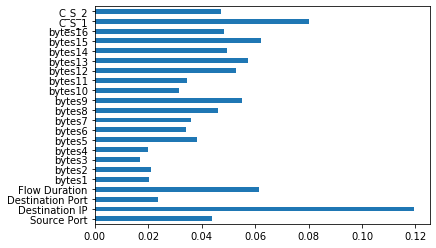

In [37]:
data=data1
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder = LabelEncoder()
label_encoder1.fit(data['label'])
label_encoder2.fit(data['Destination IP'])
data['Destination IP'] = label_encoder.fit_transform(data['Destination IP'])
data['target'] = label_encoder.fit_transform(data['label'])
data=data.drop(columns="label")
X = data.iloc[:,0:-1]  #independent columns
y = data.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pandas.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 42)
clf = RandomForestClassifier(n_jobs=2,random_state=0, verbose=1,n_estimators=10)
bclf = AdaBoostClassifier(base_estimator=clf,n_estimators=clf.n_estimators)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
bclf.fit(train_X, train_y)
predictions=bclf.predict(test_X)
print(classification_report(test_y,predictions))
scores = cross_val_score(bclf, train_X, train_y, cv=5)
print(scores.mean())

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    2.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       564
           1       0.93      0.74      0.83       471
           2       0.89      0.79      0.84       409
           3       0.59      0.81      0.68      1656
           4       0.72      0.42      0.53       460
           5       0.76      0.92      0.83      2060
           6       0.83      0.85      0.84      1078
           7       0.90      0.69      0.78       215
           8       0.88      0.93      0.91       442
           9       0.95      0.54      0.68       261
          10       0.78      0.73      0.76       754
          11       0.98      0.89      0.94       523
          12       0.92      0.81      0.86       660
          13       0.91      0.68      0.78       364
          14       0.96      0.31      0.47       236
          15       0.67      0.81      0.74      4258
          16       0.91      0.82      0.86      1432
          17       0.95    

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
exception calling callback for <Future at 0x7fbd805c20b8 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
'''
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 113, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/__init__.py", line 7, in <module>
    from .forest import RandomForestClassifier
  File "/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py", line 53, in <module>
    from ..metrics import r2_score
  File "/usr/local/lib/python3.6/dist-packages/sklearn/metrics/__init__.py", line 7, in <module>
    from .ranking import auc
  File "/usr/local/lib/python3.6/dist

BrokenProcessPool: ignored

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predictions)

0.8404252041287937

In [44]:
filename1 = 'dataset2.csv'
data2 = pandas.read_csv(filename1)
data2=data2.drop(columns="Source IP")
#data2=data2.drop(columns="Destination IP")
data2=data2.drop(columns="date")
data2=data2.drop(columns="network")
data2=data2.drop(columns="Protocol")
data2.drop(data2.iloc[:, 22:34], inplace = True, axis = 1)
data2.replace('', np.nan, inplace=True)
counts["Other"]=1
counts1 = data2['label'].value_counts().to_dict()
data3=data1.drop_duplicates(subset=['label'])
for k,l in data3.iterrows():
  if l['label'] not in list(set(counts.keys())-set(counts1.keys())):
    data3.drop(k, inplace=True)
data2=data2.append(data3, ignore_index=True)
data2.shape
counts1 = data2['label'].value_counts().to_dict()
set(counts1.keys())-set(counts.keys())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


{'189Mail',
 'AmapLocateService',
 'AnJianJingLing',
 'CourseLike',
 'Ctrip',
 'Evernote',
 'Knives Out ',
 'LYCOM',
 'MaoPu',
 'MiGuVideo',
 'OPengExplore',
 'PushService',
 'Qunar',
 'RootJingling',
 'SystemUpdate',
 'Vipshop',
 'WPS Office',
 'XiaoEnAi',
 'elongTravel',
 'sina_mail',
 'tencent_map',
 'waphome'}

In [0]:
counts0 = data1['label'].value_counts().to_dict()
for m,n in data2.iterrows():
  if n['label'] in list(set(counts1.keys())-set(counts0.keys())):
    data2.drop(m, inplace=True)
counts1 = data2['label'].value_counts().to_dict()


In [42]:
label_encoder3 = LabelEncoder()
data2['target'] = label_encoder1.transform(data2['label'])
data2['Destination IP'] = label_encoder2.transform(data2['Destination IP'])
data2=data2.drop(columns="label")
X1 = data2.iloc[:,0:-1]  #independent columns
y1 = data2.iloc[:,-1]

ValueError: ignored

In [27]:
predictions1=clf.predict(X1)
print(classification_report(y1,predictions1))

NotFittedError: ignored

In [28]:
X2=X
y2=y
X3=X1
y3=y1
X2['target']=y2
X3['target']=y3
X2=X2.append(X3, ignore_index=True)
X3=pandas.DataFrame()
for a,b in X2.iterrows():
  if a%100==0:
    X3=X3.append(b)
    X2.drop(a, inplace=True)
X4 = X2.iloc[:,0:-1]
y4 = X2.iloc[:,-1]
X5 = X3.iloc[:,0:-1]
y5 = X3.iloc[:,-1]
train_X4, test_X4, train_y4, test_y4 = train_test_split(X4, y4, test_size = 0.25, random_state = 42)
clf2 = RandomForestClassifier(n_jobs=2, random_state=0, verbose=1,n_estimators=10)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf2.fit(train_X4, train_y4)
predictions2=clf2.predict(test_X4)
print(classification_report(test_y4,predictions2))
scores2 = cross_val_score(clf2, train_X4, train_y4, cv=5)
print(scores2.mean())

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


ValueError: ignored

In [0]:
predictions2=clf2.predict(X5)
print(classification_report(y5,predictions2))

              precision    recall  f1-score   support

         0.0       0.58      0.72      0.64        25
         1.0       0.80      0.84      0.82        19
         2.0       0.88      0.88      0.88        26
         3.0       0.53      0.75      0.62        67
         4.0       0.42      0.38      0.40        21
         5.0       0.80      0.88      0.84        86
         6.0       0.76      0.76      0.76        46
         7.0       0.70      0.64      0.67        11
         8.0       0.94      0.88      0.91        17
         9.0       0.62      0.67      0.64        12
        10.0       0.50      0.20      0.29         5
        11.0       0.57      0.62      0.59        34
        12.0       0.95      0.91      0.93        22
        13.0       0.67      0.80      0.73        30
        14.0       0.67      0.67      0.67         6
        15.0       0.73      0.65      0.69        17
        16.0       0.86      0.46      0.60        13
        17.0       0.72    

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [0]:
from sklearn.svm import SVC
# Round 1
print("Round 1 - kernel='rbf', probability=True")

clf3 = SVC(kernel='rbf', probability=True, verbose=1)
scores3 = cross_val_score(clf3, train_X4, train_y4, cv=5, scoring='accuracy')

print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

In [0]:
# Round 2
print("Round 2 - kernel='sigmoid', probability=True")

clf3 = SVC(kernel='sigmoid', probability=True)
scores3 = cross_val_score(clf3, train_X4, train_y4, cv=10, scoring='accuracy')

print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

In [0]:
# Round 3
print("Round 3 - kernel='poly', probability=True, degree=3")

clf3 = SVC(kernel='poly', probability=True, degree=3)
scores3 = cross_val_score(clf3, train_X4, train_y4, cv=10, scoring='accuracy')

print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

In [0]:
# Round 4
print("Round 4 - kernel='poly', probability=True, degree=8")

clf3 = SVC(kernel='poly', probability=True, degree=8)
scores3 = cross_val_score(clf3, train_X4, train_y4, cv=10, scoring='accuracy')

print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))

In [0]:
# Round 5
print("Round 5 - kernel='poly', C=10, probability=True, degree=8")

clf3 = SVC(kernel='poly', C=10, probability=True, degree=8)
scores3 = cross_val_score(clf3, train_X4, train_y4, cv=10, scoring='accuracy')

print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std() * 2))